<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/EN3150_Emeralds_A03_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Waste Dataset**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import zipfile
import shutil
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your dataset zip file in Google Drive
zip_path = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/realwaste.zip'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste')

['realwaste-main']

In [19]:
unzipped_dir = "/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste/realwaste-main/RealWaste"

# Check if the dataset has been successfully extracted
os.listdir(unzipped_dir)

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(unzipped_dir):
    class_path = os.path.join(unzipped_dir, class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Cardboard, Number of images: 461
Class: Food Organics, Number of images: 411
Class: Glass, Number of images: 420
Class: Metal, Number of images: 790
Class: Miscellaneous Trash, Number of images: 495
Class: Paper, Number of images: 500
Class: Plastic, Number of images: 921
Class: Textile Trash, Number of images: 318
Class: Vegetation, Number of images: 436


In [36]:
# Set paths
dataset_dir = unzipped_dir
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test splits
base_dir = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/SplittedWasteData'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders for each class in train, val, and test directories
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the dataset for each class
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Split images into 60% train, 20% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split completed!")

Dataset split completed!


In [4]:
base_dir = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/SplittedWasteData'

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory(base_dir+"/train",
                                          target_size=(200, 200),
                                          batch_size=64,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory(base_dir+"/val",
                                          target_size=(200, 200),
                                          batch_size=64,
                                          class_mode='categorical')

Found 2848 images belonging to 9 classes.
Found 950 images belonging to 9 classes.


In [102]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  2848
Validation Dataset:  950


In [86]:
class_indices = train_dataset.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[[0.6627451  0.68235296 0.69411767]
  [0.65882355 0.6745098  0.6862745 ]
  [0.6745098  0.6901961  0.7019608 ]
  ...
  [0.79215693 0.8078432  0.8117648 ]
  [0.79215693 0.81568635 0.81568635]
  [0.78823537 0.80392164 0.8078432 ]]

 [[0.6784314  0.69803923 0.70980394]
  [0.64705884 0.6627451  0.6745098 ]
  [0.654902   0.67058825 0.68235296]
  ...
  [0.7490196  0.76470596 0.7686275 ]
  [0.7843138  0.8078432  0.8078432 ]
  [0.8117648  0.82745105 0.8313726 ]]

 [[0.6901961  0.70980394 0.72156864]
  [0.70980394 0.7254902  0.7372549 ]
  [0.70980394 0.7254902  0.7372549 ]
  ...
  [0.7686275  0.7843138  0.78823537]
  [0.76470596 0.78823537 0.78823537]
  [0.7803922  0.7960785  0.8000001 ]]

 ...

 [[0.54509807 0.5529412  0.5411765 ]
  [0.5294118  0.5372549  0.5254902 ]
  [0.5568628  0.5647059  0.5529412 ]
  ...
  [0.6509804  0.64705884 0.627451  ]
  [0.6313726  0.63529414 0.6117647 ]
  [0.6627451  0.6666667  0.63529414]]

 [[0.5803922  0.5882353  0.5764706 ]
  [0.529

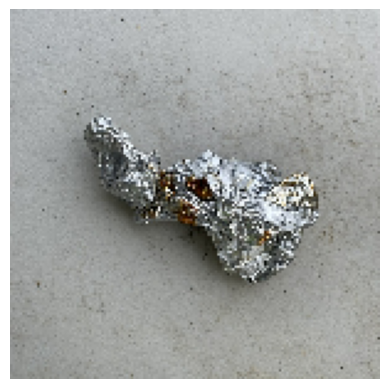

In [87]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])
plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 672ms/step - accuracy: 0.1408 - loss: 4.6908 - val_accuracy: 0.3084 - val_loss: 2.0231
Epoch 2/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2969 - loss: 2.0245

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.2969 - loss: 2.0245 - val_accuracy: 0.3053 - val_loss: 2.0232
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 534ms/step - accuracy: 0.2737 - loss: 2.0111 - val_accuracy: 0.3242 - val_loss: 1.9021
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.3438 - loss: 1.9460 - val_accuracy: 0.3147 - val_loss: 1.9066
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 542ms/step - accuracy: 0.3288 - loss: 1.8900 - val_accuracy: 0.3674 - val_loss: 1.7923
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.4219 - loss: 1.7312 - val_accuracy: 0.3684 - val_loss: 1.7762
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 546ms/step - accuracy: 0.3921 - loss: 1.7076 - val_accuracy: 0.4053 - val_loss: 1.6641
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.4844 - loss: 1.4399 - val_accuracy: 0.3895 - val_loss: 1.6664
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.4306 - loss: 1.6219 - val_accuracy: 0.4789 -